# Breast Cancer Diagnosis

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (patient doesn't have breast cancer) or malignant (patient has breast cancer). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.


In this assignment, you will be analyzing ultrasound data of breast cancer tumors. Several characteristics of the tumor are given in the dataset and you will create a model that will predict whether or not a patient has a positive breast cancer diagnosis based off of the tumor characteristics.

This data set contains the following features:

* id (patientid)
* name
* radius (the distance from the center to the circumference of the tumor)
* texture (standard deviation of gray-scale values)
* perimeter (circumference of the tumor, approx. 2*3.14 *radius)
* area
* smoothness (local variation in radius lengths)
* compactness
* concavity (severity of concave portions of the contour)
* symmetry
* fractal_dimension
* age
* diagnosis: 0 or 1 indicating whether patient has breast cancer or not




## Library and Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bcddata=pd.read_csv('breastcancer.csv')

In [3]:
bcddata.head()

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [4]:
bcddata.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
count,498.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.326635,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798,39.467487,0.372583
std,3.506881,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.027414,0.007060,13.604683,0.483918
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960,16.000000,0.000000
25%,11.817500,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700,27.000000,0.000000
50%,13.465000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540,40.000000,0.000000
75%,16.155000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120,52.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440,62.000000,1.000000


In [5]:
bcddata.isnull().sum()

id                    0
name                  0
radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

In [6]:
bcddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                   569 non-null object
name                 569 non-null object
radius               498 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
age                  569 non-null int64
diagnosis            569 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


## Exploratory Data Analysis through Visualizations


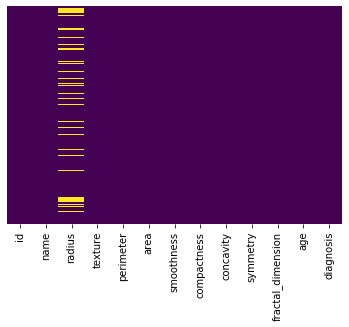

In [7]:
sns.heatmap(bcddata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

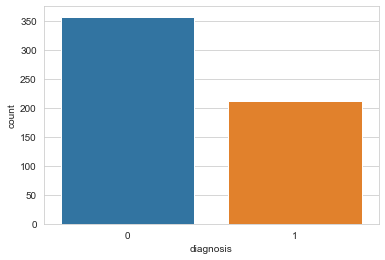

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=bcddata)

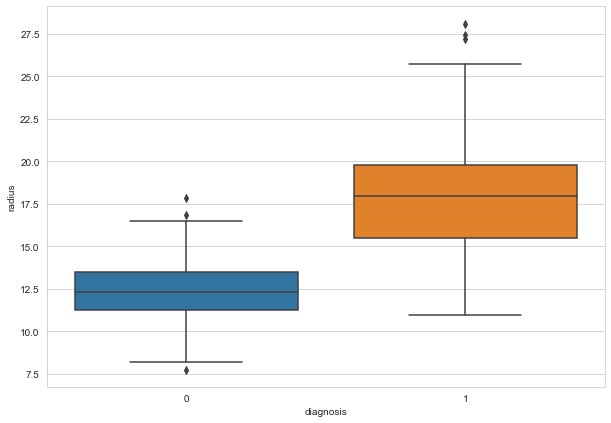

In [9]:
plt.figure(figsize=(10,7))
sns.boxplot(x="diagnosis",y="radius",data=bcddata)

## Data Cleaning

In [10]:
bcddata.groupby("perimeter")["radius"].mean()

perimeter
43.79        NaN
47.92      7.760
47.98        NaN
48.34        NaN
51.71      8.196
           ...  
171.50    25.220
174.20    25.730
182.10    27.220
186.90    27.420
188.50    28.110
Name: radius, Length: 522, dtype: float64

In [11]:
def getrad(cols):
    radius = cols[0]
    perimeter = cols[1]
    
    if pd.isnull(radius):
        return perimeter/(2 * 3.14159)
    else:
        return radius

In [12]:
bcddata["radius"]=bcddata[["radius","perimeter"]].apply(getrad,axis=1)

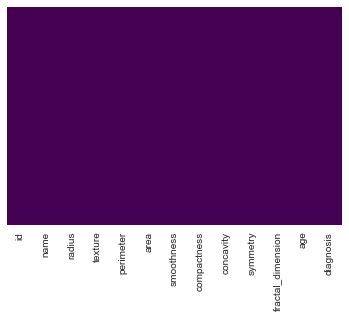

In [13]:
sns.heatmap(bcddata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
bcddata.drop(["id","name"],axis=1,inplace=True)

In [15]:
bcddata.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,19.544244,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,12.347251,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


## Building the Model

In [16]:
X = bcddata.drop("diagnosis",axis=1)
y = bcddata["diagnosis"]

In [17]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,19.544244,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.570000,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.690000,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,12.347251,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.290000,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [23]:
logreg = LogisticRegression()

In [24]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions=logreg.predict(X_test)

## Predictions and Evaluations

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,predictions)

array([[143,   5],
       [ 16,  64]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       148
           1       0.93      0.80      0.86        80

    accuracy                           0.91       228
   macro avg       0.91      0.88      0.90       228
weighted avg       0.91      0.91      0.91       228

